
# BurnedSolver: Modelo con Redes Neuronales

Este *notebook* contiene la implementación de una red neuronal usando la libería Keras, incluida en Tensorflow para decidir que movimiento escoger dependiendo del estado actual de la partida.

Con este modelo se logra una alta precisión en la toma de decisiones adecuada para cada situación del laberinto.

En este caso, el dataset con el que se trabajará será uno [personal](https://drive.google.com/drive/folders/10ZLjHQUlALU6iUOInOCq6R00iHvS1Q2B?usp=share_link) que incluye 1171 Estados y soluciones como TrainSet totalmente distintos a los dados por los profesores de la asignatura IASI, permitiendo así usar estos como TestSet.

## Como punto de partida, ¿cuáles serán los elementos de entrada de la red?

Pues serán los siguentes:

- Monedas neceasarias para poder acceder a la meta     `int`
- Monedas del estado actual                            `int`
- Laberinto de 10x10 `Array of 10x10 ints`

Lo que nos deja con un total de 102 datos de entrada


## ¿Y cuales serán los elementos de salida de la red?

Pues serán los siguentes:

- Dirección a tomar `8 Posibilidades`

Una neurona por posibilidad

## 0. Preparacion para el dataset.

Ejecuta esta celda para poder luego cargar el dataset LABECOIN usando LeerEstado y LeerSoluciones. Estos módulos reciben un array en el que deberán añadir los datos procesados de las carpetas Estados y Solucionque se especifiquen por los parámetros num1 y num2.

In [ ]:
import os
def LeerEstado(X_train, num1, num2):
    # Abrir el archivo
    with open("/content/drive/MyDrive/Entrenamientos/Estados/"+str(num1)+"_"+str(num2)+".txt", 'r') as f:
        arr = []
        arr.append(int(f.readline().strip()))
        arr.append(int(f.readline().strip()))
        for line in f:
            row = line.strip().split(",")
            for num in row:
                arr.append(int(num))
    f.close()
    X_train.append(arr)

def LeerSoluciones(y_train, num1, num2):
    # Construir la ruta del archivo
    filename = f'/content/drive/MyDrive/Entrenamientos/Solucion/{num1}_{num2}.txt'

    # Abrir el archivo y leer la dirección
    with open(filename, "r") as f:
        direccion = f.readline().strip()

    # Crear un array lleno de 0s
    arr = [0] * 8

    # Asignar un valor de 1 al elemento correspondiente según la dirección
    if direccion == 'Iquierda':
        arr[0] = 1
    elif direccion == 'Arriba':
        arr[1] = 1
    elif direccion == 'Abajo':
        arr[2] = 1
    elif direccion == 'Derecha':
        arr[3] = 1
    elif direccion == 'Izquierda Arriba':
        arr[4] = 1
    elif direccion == 'Izquierda Abajo':
        arr[5] = 1
    elif direccion == 'Derecha Abajo':
        arr[6] = 1
    elif direccion == 'Derecha Arriba':
        arr[7] = 1

    # Agregar el array al conjunto de soluciones
    y_train.append(arr)



## 1. Cargar el dataset.

Ejecuta esta celda para cargar el dataset LABECOIN usando LeerEstado y LeerSoluciones. Estos módulos junto a un for que busca de forma ordenada los archivos de las carpetas Estados, Solucion, EstadosTEST, SolucionTEST y los carga en X_train, y_train, X_test, y_test respectivamente.

In [ ]:
import numpy              as np
import matplotlib.pyplot  as plt
import keras
import os
from tensorflow.keras.utils import to_categorical


dir_path1 = "/content/drive/MyDrive/Entrenamientos/Estados"
dir_path2 = "/content/drive/MyDrive/Entrenamientos/Solucion/"
dir_path3 = "/content/drive/MyDrive/Entrenamientos/EstadosTEST"
dir_path4 = "/content/drive/MyDrive/Entrenamientos/SolucionTEST/"

# Listar archivos en la carpeta y ordenar alfabéticamente
estado_files = sorted([f for f in os.listdir(dir_path1) if f.startswith('ESTADO')])
solucion_files = sorted([f for f in os.listdir(dir_path2) if f.startswith('SOLUCION')])
print(estado_files)
print(solucion_files)

# Obtener la lista de archivos en la carpeta
files = estado_files
# Crear el conjunto de problemas
Xbeta = []
# Leer cada archivo y agregar la solución al conjunto de soluciones
for filename in files:
    # Obtener los números a partir del nombre del archivo
    num1, num2 = filename.split("_")
    num2 = num2.split(".")[0]

    # Leer el archivo y agregar la solución al conjunto de soluciones
    LeerEstado(Xbeta, num1, num2)


# Obtener la lista de archivos en la carpeta
files = solucion_files

# Crear el conjunto de soluciones
ybeta = []

# Leer cada archivo y agregar la solución al conjunto de soluciones
for filename in files:
    # Obtener los números a partir del nombre del archivo
    num1, num2 = filename.split("_")
    num2 = num2.split(".")[0]

    # Leer el archivo y agregar la solución al conjunto de soluciones
    LeerSoluciones(ybeta, num1, num2)
X_train=np.array(Xbeta, dtype=int)
y_train=np.array(ybeta, dtype=int)

#print(Xbeta[0])
estado_files = sorted([f for f in os.listdir(dir_path3) if f.startswith('ESTADO')])
solucion_files = sorted([f for f in os.listdir(dir_path4) if f.startswith('SOLUCION')])


# Listar archivos en la carpeta y ordenar alfabéticamente
estado_files = sorted([f for f in os.listdir(dir_path1) if f.startswith('ESTADO')])
solucion_files = sorted([f for f in os.listdir(dir_path2) if f.startswith('SOLUCION')])
print(estado_files)
print(solucion_files)

# Obtener la lista de archivos en la carpeta
files = estado_files
# Crear el conjunto de problemas
XtestBet = []
# Leer cada archivo y agregar la solución al conjunto de soluciones
for filename in files:
    # Obtener los números a partir del nombre del archivo
    num1, num2 = filename.split("_")
    num2 = num2.split(".")[0]

    # Leer el archivo y agregar la solución al conjunto de soluciones
    LeerEstado(XtestBet, num1, num2)


# Obtener la lista de archivos en la carpeta
files = solucion_files

# Crear el conjunto de soluciones
ytestbet = []

# Leer cada archivo y agregar la solución al conjunto de soluciones
for filename in files:
    # Obtener los números a partir del nombre del archivo
    num1, num2 = filename.split("_")
    num2 = num2.split(".")[0]

    # Leer el archivo y agregar la solución al conjunto de soluciones
    LeerSoluciones(ytestbet, num1, num2)
X_test=np.array(XtestBet, dtype=int)
y_test=np.array(ytestbet, dtype=int)

print("Rank of X_train:  ", X_train.ndim)
print("Rank of Y_train:  ", y_train.ndim)

print(X_train.size)
print(y_train.size)

['ESTADO24_0.txt', 'ESTADO24_1.txt', 'ESTADO24_10.txt', 'ESTADO24_11.txt', 'ESTADO24_12.txt', 'ESTADO24_13.txt', 'ESTADO24_14.txt', 'ESTADO24_15.txt', 'ESTADO24_16.txt', 'ESTADO24_17.txt', 'ESTADO24_18.txt', 'ESTADO24_19.txt', 'ESTADO24_2.txt', 'ESTADO24_20.txt', 'ESTADO24_21.txt', 'ESTADO24_22.txt', 'ESTADO24_23.txt', 'ESTADO24_24.txt', 'ESTADO24_25.txt', 'ESTADO24_26.txt', 'ESTADO24_27.txt', 'ESTADO24_28.txt', 'ESTADO24_29.txt', 'ESTADO24_3.txt', 'ESTADO24_4.txt', 'ESTADO24_5.txt', 'ESTADO24_6.txt', 'ESTADO24_7.txt', 'ESTADO24_8.txt', 'ESTADO24_9.txt', 'ESTADO25_0.txt', 'ESTADO25_1.txt', 'ESTADO25_10.txt', 'ESTADO25_11.txt', 'ESTADO25_12.txt', 'ESTADO25_13.txt', 'ESTADO25_14.txt', 'ESTADO25_15.txt', 'ESTADO25_16.txt', 'ESTADO25_17.txt', 'ESTADO25_18.txt', 'ESTADO25_19.txt', 'ESTADO25_2.txt', 'ESTADO25_3.txt', 'ESTADO25_4.txt', 'ESTADO25_5.txt', 'ESTADO25_6.txt', 'ESTADO25_7.txt', 'ESTADO25_8.txt', 'ESTADO25_9.txt', 'ESTADO26_0.txt', 'ESTADO26_1.txt', 'ESTADO26_10.txt', 'ESTADO26_11.t

In [ ]:
import numpy              as np
import matplotlib.pyplot  as plt
import keras
from   keras.datasets     import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Rank of X_train:  ", X_train.ndim)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Rank of X_test:  ", X_test.ndim)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)


# Plot the number "num"
plt.gray()
plt.matshow(X_train[73, :].reshape(28,28))
plt.show()
print("Then number is a: ", y_train[73])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Selección de características.

El dataset MNIST está compuesto por unas $70.000$ imágenes, cada una definiendo $28x28$ valores decimales. Como consecuencia, procesar este conjunto de datos conduce al modelo MLP a consumir una cantidad considerable de tiempo. Para mitigar esto, se procede a realizar tres acciones:

1. Convertir las características a float
2. Unroll data: $(m, h, w) \rightarrow (m, h*w)$.
3. One-hot encoding of labels.

Estas tareas se emprenden tanto en el conjunto de **entrenamiento** como en el de **evaluación**.


## 4. Definición del modelo Keras (Sequential)

Para construir nuestro modelo en Keras, primero importamos la clase `Sequential` desde `keras.models`. `Sequential` es un modelo lineal donde las capas se agregan secuencialmente una tras otra. Luego, importamos las clases `Dense` y `Dropout` desde `keras.layers`, que se utilizarán para construir las capas de nuestra red neuronal.

La definición del modelo comienza creando una instancia de `Sequential` y llamándola `model`. A continuación, agregamos una capa `Dense` con 32 neuronas y una función de activación `ReLU`, especificando `input_dim = 102` para indicar que la entrada tiene 102 dimensiones.

Luego, agregamos una segunda capa oculta `Dense` con 16 neuronas y una función de activación `ReLU`.

Finalmente, agregamos una capa de salida `Dense` con 8 neuronas y una función de activación `Softmax`, que se utiliza para clasificación de varias clases. La salida de la red neuronal se interpretará como una distribución de probabilidad sobre las 8 posibles clases.

Es importante destacar que el modelo se construye en Keras como una serie de capas interconectadas y que cada capa se conecta automáticamente con la capa anterior. Por lo tanto, no es necesario especificar explícitamente las conexiones entre las capas.

En resumen, el modelo Keras que hemos definido consta de tres capas: una capa de entrada con 102 neuronas, una capa oculta intermedia con 16 neuronas y una capa de salida con 8 neuronas. La función de activación ReLU se utiliza en las capas de entrada y oculta, mientras que la función de activación Softmax se utiliza en la capa de salida para clasificación de varias clases.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Define el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(32, input_dim=102, activation='relu'))

# Capa oculta
model.add(Dense(16, activation='relu'))

# Capa de salida
model.add(Dense(8, activation='softmax'))




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                3296      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
Total params: 4,616
Trainable params: 4,616
Non-trainable params: 0
_________________________________________________________________


## 5. Configuración del proceso de aprendizaje

Antes de entrenar el modelo, es necesario configurar el proceso de aprendizaje. Esto se hace mediante la definición de los hiperparámetros que afectan la manera en que la red neuronal aprenderá a partir de los datos.

En este caso, se han establecido los siguientes hiperparámetros en el modelo:

- **loss**: se utiliza la función de pérdida categorical_crossentropy, que se utiliza para modelos de clasificación de múltiples categorías. Esta función mide la discrepancia entre las salidas del modelo y las salidas esperadas.
- **optimizer**: se utiliza el optimizador Adam, que se adapta automáticamente la tasa de aprendizaje a medida que se va entrenando el modelo.
- **metrics**: se utiliza la métrica de precisión (accuracy) para evaluar la capacidad del modelo de clasificar correctamente las imágenes de prueba.

Estos hiperparámetros se establecen mediante la función compile de Keras, que compila el modelo para la fase de entrenamiento. Una vez establecidos los hiperparámetros, se puede llamar a la función summary para obtener una descripción detallada del modelo.


In [ ]:

# Compila el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

## 6. Entrenar el modelo

Para entrenar el modelo, utilizamos la función fit de Keras, que ajusta los pesos del modelo en función del conjunto de entrenamiento. La función fit toma tres argumentos principales: los datos de entrada de entrenamiento (X_train), los datos de salida esperados (y_train) y el número de épocas (epochs) que queremos entrenar el modelo.

En este caso, utilizamos los datos de entrada X_train y los datos de salida esperados y_train que hemos preparado previamente. Además, especificamos un valor de 400 para epochs, lo que significa que entrenaremos el modelo durante 400 iteraciones completas del conjunto de entrenamiento. También especificamos un tamaño de lote de 15 mediante el argumento batch_size.

El proceso de entrenamiento se realiza mediante la minimización de la función de pérdida, que se calcula comparando las salidas del modelo con las salidas esperadas para el conjunto de entrenamiento. El historial de entrenamiento se almacena en la variable historial, que nos permite acceder a los valores de pérdida y precisión durante el entrenamiento.


In [ ]:
historial=model.fit(X_train, y_train, epochs=400, batch_size=15)

Epoch 1/400
79/79 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9846
Epoch 2/400
79/79 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9855
Epoch 3/400
79/79 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9821
Epoch 4/400
79/79 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9838
Epoch 5/400
79/79 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9752
Epoch 6/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8933
Epoch 7/400
79/79 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.8113
Epoch 8/400
79/79 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8753
Epoch 9/400
79/79 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.9112
Epoch 10/400
79/79 [==============================] - 0s 3ms/step - loss: 0.9325 - accuracy: 0.7822
Epoch 11/

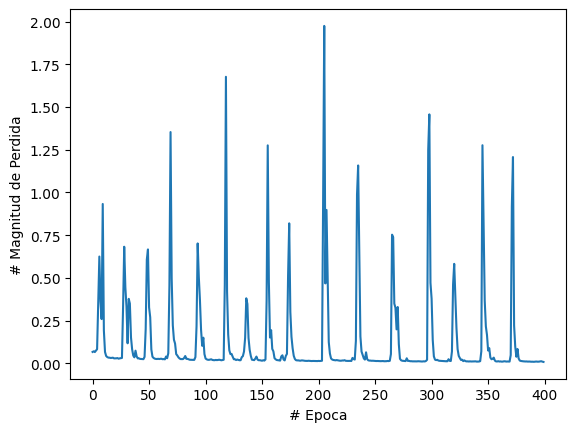

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("# Magnitud de Perdida")
plt.plot(historial.history["loss"])

## 7. Evaluación del modelo

Utilizando el conjunto de validación, evalúa el modelo con las siguientes instrucciones.



In [ ]:
test_loss, test_acc = model.evaluate (X_test, y_test)

print("Test loss:    ", test_loss)
print("Test accuray: ", test_acc)


37/37 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Test loss:     0.006620804313570261
Test accuray:  1.0


## 8. Lleva a cabo una predicción

Podrás cambiar el dígito a determinar si modificas la posición de los test y pred para obtener así una prediccion de los movimientos a hacer para el laberinto

In [ ]:
y_pred = model.predict(X_test)

# Take a look to the predictions in the example 8
i=int(input("Select the test"))
print(np.round(y_pred[i]))
print(np.round(y_test[i]))
print("Predicted: ", np.argmax(y_pred[i]))
print("Actual:    ", np.argmax(y_test[i]))

# Plot


37/37 [==============================] - 0s 2ms/step
Select the test145
[0. 0. 0. 0. 0. 1. 0. 0.]
[0 0 0 0 0 1 0 0]
Predicted:  5
Actual:     5


## 9. Guarda tu modelo

Si te convence el resultado guardalo en el siguiente bloque de código

In [ ]:
from keras.models import load_model

# Guardar el modelo entrenado en un archivo HDF5 en la ruta especificada
model.save('/content/drive/MyDrive/Modelo Completo/BurnedSolverNN.h5')


## 10. Carga tu modelo

Si has vuelto a abrir este collab para más cambios puedes cargar aquí tu modelo

In [ ]:
from keras.models import load_model

# Cargar el modelo guardado desde la ruta especificada
model = load_model('/content/drive/MyDrive/Modelo Completo/BurnedSolverNN.h5')